## Начало лабораторной работы

In [1]:
import pandas as pd
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


### Бизнес-цели

1. Прогнозирование цен на золото:

Цель: Разработать модель, которая будет предсказывать объем выкупленных акций на основе: цены открытия, цены закрытия, самой высокой цене, самой низкой цене
Применение:
Узнать, какие лучше цены выставлять на акции.

2. Оптимизация цен на акции:
Цель: Определить оптимальную цену на акцию, чтобы объем их скупа был больше.


1. Прогнозирование объема проданных акций

In [2]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Устанавливаем случайное состояние
random_state = 28

# Рассчитываем среднее значение объема
average_count = df['Volume'].mean()
print(f"Среднее значение поля 'Volume: {average_count}")

# Создаем новую переменную, указывающую, превышает ли объемная продажа среднюю
df["above_average_volume"] = (df["Volume"] > average_count).astype(int)

# Рассчитываем волатильность (разницу между максимальной и минимальной объемная продажаю)
df["volume_volatility"] = df["Volume"].max() - df["Volume"].min()

# Выводим первые строки измененной таблицы для проверки
print(df.head())

Среднее значение поля 'Volume: 9081991.374023996
        Date      Open      High       Low     Close  Adj Close  Volume  \
0  6/22/2001  3.428571  3.428571  3.428571  3.428571   2.806002       0   
1  6/25/2001  3.428571  3.428571  3.428571  3.428571   2.806002       0   
2  6/26/2001  3.714286  3.714286  3.714286  3.714286   3.039837       0   
3  6/27/2001  3.714286  3.714286  3.714286  3.714286   3.039837       0   
4  6/28/2001  3.714286  3.714286  3.714286  3.714286   3.039837       0   

   above_average_volume  volume_volatility  
0                     0           76714000  
1                     0           76714000  
2                     0           76714000  
3                     0           76714000  
4                     0           76714000  


2. Оптимизация параметров магазина:

In [3]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднюю объемную продажу для каждого значения каждого признака
for column in ["Open", "Close", "High", "Low"]:
    print(f"Средняя объемная продажа для '{column}':")
    print(df.groupby(column)["Volume"].mean())
    print()


print("Средняя объемная продажа для комбинации 'Open' и 'Close':")
print(df.groupby(["Open", "Close"])["Volume"].mean())
print()


print("Средняя объемная продажа для комбинации 'High' и 'Low':")
print(df.groupby(["High", "Low"])["Volume"].mean())
print()

Средняя объемная продажа для 'Open':
Open
1.142857     2.815714e+02
1.260000     1.500000e+02
1.320000     5.700000e+03
1.380000     1.200000e+03
1.400000     0.000000e+00
                 ...     
19.940001    8.288800e+06
20.059999    6.851500e+06
20.100000    4.836700e+06
20.250000    4.154200e+06
20.420000    4.264000e+06
Name: Volume, Length: 1421, dtype: float64

Средняя объемная продажа для 'Close':
Close
1.142857     2.815714e+02
1.260000     1.500000e+02
1.400000     3.000000e+02
1.410000     1.735315e+06
1.420000     3.000000e+03
                 ...     
19.750000    5.734200e+06
20.080000    4.836700e+06
20.129999    6.276400e+06
20.209999    8.799600e+06
20.389999    6.851500e+06
Name: Volume, Length: 1442, dtype: float64

Средняя объемная продажа для 'High':
High
1.142857     2.815714e+02
1.260000     1.500000e+02
1.400000     3.000000e+02
1.410000     7.909091e+02
1.428571     1.957805e+02
                 ...     
20.209999    8.799600e+06
20.309999    4.154200e+06
20.3

### Выбор ориентира:
1. Прогнозирование стоимости акций взносов:
Ориентир:

R² (коэффициент детерминации): 0.75 - 0.85

MAE (средняя абсолютная ошибка): 2000000 - 3.500.000 продаж

RMSE (среднеквадратичная ошибка): 2200000 - 3600000 продаж

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")


# Разделяем данные на признаки (X) и целевую переменную (y)

X = df.drop(columns=["Volume", "Date"], axis=1)

y = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Проверяем, достигнуты ли ориентиры
if r2 >= 0.75 and mae <= 1500000 and rmse <= 1700000:
    print("Ориентиры для прогнозирования достигнуты!")
else:
    print("Ориентиры для прогнозирования не достигнуты.")


columns_to_group = [
    "Open",
    "High",
    "Close", "Low"
]

# Рассчитываем среднюю объемная продажа для каждого значения каждого признака
for column in columns_to_group:
    print(f"Средняя объемная продажа '{column}':")
    print(df.groupby(column)["Volume"].mean())
    print()

# Рассчитываем среднюю объемная продажа для комбинаций признаков

print(
    "Средняя посещаемость взносов для комбинации 'Open' и 'Close':"
)
print(df.groupby(["Open", "Close"])["Volume"].mean())
print()

print(
    "Средняя посещаемость взносов для комбинации 'High' и 'Low':"
)
print(df.groupby(["High", "Low"])["Volume"].mean())
print()

MAE: 4479413.782319424
MSE: 33820915982442.465
RMSE: 5815575.292474723
R²: 0.42948176526183957
Ориентиры для прогнозирования не достигнуты.
Средняя объемная продажа 'Open':
Open
1.142857     2.815714e+02
1.260000     1.500000e+02
1.320000     5.700000e+03
1.380000     1.200000e+03
1.400000     0.000000e+00
                 ...     
19.940001    8.288800e+06
20.059999    6.851500e+06
20.100000    4.836700e+06
20.250000    4.154200e+06
20.420000    4.264000e+06
Name: Volume, Length: 1421, dtype: float64

Средняя объемная продажа 'High':
High
1.142857     2.815714e+02
1.260000     1.500000e+02
1.400000     3.000000e+02
1.410000     7.909091e+02
1.428571     1.957805e+02
                 ...     
20.209999    8.799600e+06
20.309999    4.154200e+06
20.389999    4.836700e+06
20.500000    6.851500e+06
20.590000    4.264000e+06
Name: Volume, Length: 1423, dtype: float64

Средняя объемная продажа 'Close':
Close
1.142857     2.815714e+02
1.260000     1.500000e+02
1.400000     3.000000e+02
1.4100

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Анализ применимости алгоритмов обучения с учителем для решения поставленных задач:
1. Прогнозирование выкупа акций:
Задача: Регрессия

Свойства алгоритмов:

Линейная регрессия:
Применимость: Хорошо подходит для задач, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (регрессия):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (регрессия):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (регрессия):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Линейная регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.

2. Оптимизация тарифной сетки:
Задача: Классификация 

Свойства алгоритмов:

Логистическая регрессия:
Применимость: Хорошо подходит для задач бинарной классификации, где зависимость между признаками и целевой переменной линейна.
Преимущества: Проста в реализации, интерпретируема.
Недостатки: Может плохо работать, если зависимость нелинейна.

Деревья решений (классификация):
Применимость: Подходит для задач с нелинейными зависимостями.
Преимущества: Может обрабатывать категориальные признаки, не требует масштабирования данных.
Недостатки: Подвержены переобучению, могут давать нестабильные результаты.

Случайный лес (классификация):
Применимость: Хорошо подходит для задач с нелинейными зависимостями и большим количеством признаков.
Преимущества: Устойчив к переобучению, может обрабатывать категориальные признаки.
Недостатки: Менее интерпретируем, чем линейная регрессия.

Градиентный бустинг (классификация):
Применимость: Подходит для задач с нелинейными зависимостями и сложными взаимосвязями между признаками.
Преимущества: Может достигать высокой точности, устойчив к переобучению.
Недостатки: Сложнее в настройке, чем случайный лес, менее интерпретируем.

Нейронные сети (классификация):
Применимость: Подходит для задач с очень сложными зависимостями и большим количеством данных.
Преимущества: Может моделировать очень сложные зависимости.
Недостатки: Требует большого количества данных, сложнее в настройке и интерпретации.

Вывод:

Логистическая регрессия: Может быть хорошим выбором для начала, особенно если зависимость между признаками и целевой переменной линейна.

Деревья решений и случайный лес: Подходят для задач с нелинейными зависимостями.

Градиентный бустинг: Может давать более высокую точность, чем случайный лес, но требует больше времени на настройку.

Нейронные сети: Могут быть излишними для этой задачи, если данных недостаточно много.


1. Прогнозирование стоимости акций:
Выбранные модели:

Линейная регрессия

Случайный лес (регрессия)

Градиентный бустинг (регрессия)

2. Оптимизация тарифной сетки:
Выбранные модели:

Логистическая регрессия

Случайный лес (классификация)

Градиентный бустинг (классификация)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")


# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df.drop(columns = ["Volume", "Date"], axis=1)
y_reg = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи регрессии
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df.drop(columns=["Volume", "Date"], axis=1)
y_class = (df["Volume"] > df["Volume"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи классификации
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 4479413.782319424
MSE: 33820915982442.465
RMSE: 5815575.292474723
R²: 0.42948176526183957



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 2992885.6305958964
MSE: 23229080308355.86
RMSE: 4819655.621344316
R²: 0.6081533126129994



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
MAE: 3630084.451629419
MSE: 28221268640877.676
RMSE: 5312369.399889062
R²: 0.523941090908852

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.7526165556612749

Model: Random Forest Classification
Accuracy: 0.80209324452902

Model: Gradient Boosting Classification
Accuracy: 0.7849666983824929



1. Прогнозирование стоимости акций:
Конвейер для задачи регрессии:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")


numerical_cols = ["Open", "Close", "High", "Low"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df["Volume"]

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 5371500.134804331
MSE: 47781112642081.98
RMSE: 6912388.345722626
R²: 0.19399001338292088



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 4408370.880479668
MSE: 42119887803881.95
RMSE: 6489983.652050439
R²: 0.28948807744547955

Model: Gradient Boosting Regression
MAE: 4651931.4982183585
MSE: 40455010983490.94
RMSE: 6360425.377558559
R²: 0.3175725499393369



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик магазина:
Конвейер для задачи классификации:

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

numerical_cols = ["Open", "Close", "High", "Low"]
# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df["Volume"] > df["Volume"].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.6355851569933397

Model: Random Forest Classification
Accuracy: 0.6945765937202664

Model: Gradient Boosting Classification
Accuracy: 0.6936251189343482



1. Прогнозирование объема:

Настройка гиперпараметров для задачи регрессии:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 5371500.134804331
MSE: 47781112642081.98
RMSE: 6912388.345722626
R²: 0.19399001338292088



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
MAE: 4340519.215001971
MSE: 39191675053789.43
RMSE: 6260325.475068323
R²: 0.33888350984559035

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 4502839.821286126
MSE: 39536963282425.29
RMSE: 6287842.498220298
R²: 0.333058912109105



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация характеристик:

Настройка гиперпараметров для задачи классификации:

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.6584205518553758

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.69267364414843

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Accuracy: 0.6955280685061845



1. Прогнозирование посещаемости::
Задача: Регрессия

Выбор метрик:

MAE (Mean Absolute Error): Средняя абсолютная ошибка. Показывает среднее отклонение предсказанных значений от фактических. Эта метрика легко интерпретируется, так как она измеряется в тех же единицах, что и целевая переменная 

MSE (Mean Squared Error): Среднеквадратичная ошибка. Показывает среднее квадратичное отклонение предсказанных значений от фактических. Эта метрика чувствительна к выбросам, так как ошибки возводятся в квадрат.

RMSE (Root Mean Squared Error): Квадратный корень из среднеквадратичной ошибки. Показывает среднее отклонение предсказанных значений от фактических в тех же единицах, что и целевая переменная. Эта метрика также чувствительна к выбросам, но легче интерпретируется, чем MSE.

R² (R-squared): Коэффициент детерминации. Показывает, какую долю дисперсии целевой переменной объясняет модель. Значение R² близкое к 1 указывает на хорошее качество модели.

Обоснование:

MAE: Хорошо подходит для задач, где важно понимать среднее отклонение предсказаний от фактических значений.

MSE и RMSE: Полезны для задач, где важно минимизировать влияние выбросов, так как они возводят ошибки в квадрат.

R²: Позволяет оценить, насколько хорошо модель объясняет вариацию целевой переменной.

2. Оптимизация характеристик:
Задача: Классификация

Выбор метрик:

Accuracy: Доля правильных предсказаний среди всех предсказаний. Эта метрика показывает общую точность модели.

Precision: Доля правильных положительных предсказаний среди всех положительных предсказаний. Эта метрика важна, если важно минимизировать количество ложноположительных результатов.

Recall (Sensitivity): Доля правильных положительных предсказаний среди всех фактических положительных случаев. Эта метрика важна, если важно минимизировать количество ложноотрицательных результатов.

F1-score: Гармоническое среднее между precision и recall. Эта метрика показывает баланс между precision и recall.

Обоснование:

Accuracy: Хорошо подходит для задач, где классы сбалансированы.

Precision и Recall: Важны для задач, где важно минимизировать ошибки определенного типа (ложноположительные или ложноотрицательные).

F1-score: Позволяет оценить баланс между precision и recall.

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 5371500.134804331
MSE: 47781112642081.98
RMSE: 6912388.345722626
R²: 0.19399001338292088



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}
MAE: 4334820.948370353
MSE: 38984999673622.87
RMSE: 6243796.895609503
R²: 0.3423698752981901



d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 4503234.105751993
MSE: 39534389006317.54
RMSE: 6287637.7922330685
R²: 0.3331023370554158

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.6584205518553758
Precision: 0.6464646464646465
Recall: 0.4304932735426009
F1-score: 0.5168236877523553



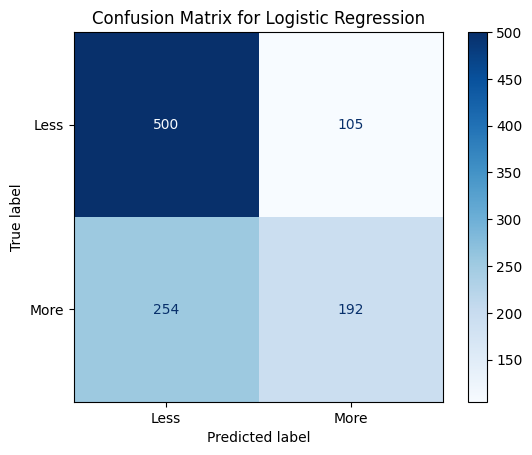

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.6879162702188392
Precision: 0.6594594594594595
Recall: 0.547085201793722
F1-score: 0.5980392156862745



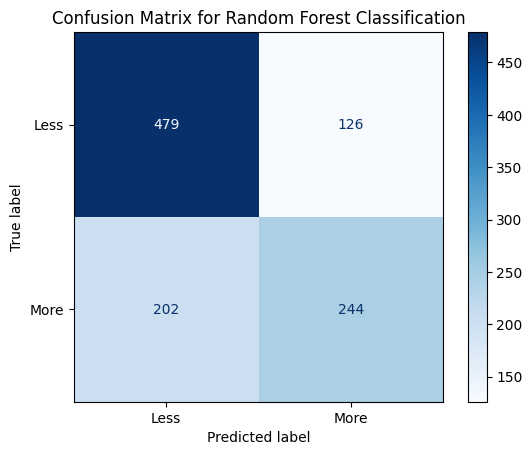

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Accuracy: 0.6936251189343482
Precision: 0.6519607843137255
Recall: 0.5964125560538116
F1-score: 0.6229508196721312



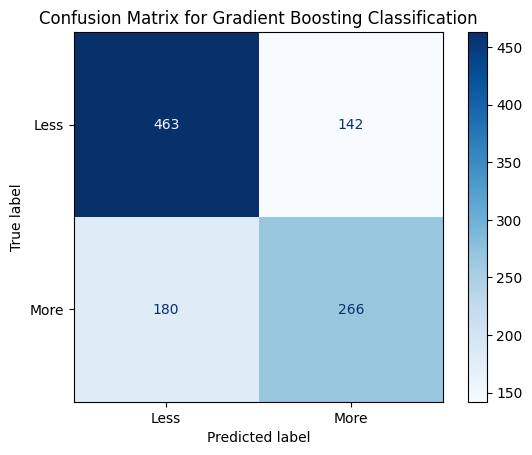

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")


numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_test_class, y_pred_class)
# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Давайте проанализируем полученные значения метрик и определим, являются ли они нормальными или их можно улучшить.

### Оценка смещения и дисперсии для задачи регрессии:

### Вывод для задачи регрессии:

- **Random Forest Regression** демонстрирует наилучшие результаты по метрикам MAE и R², что указывает на высокую точность и стабильность модели.
- **Linear Regression** и **Gradient Boosting Regression** также показывают хорошие результаты, но уступают случайному лесу.

### Вывод для задачи классификации:

- **Random Forest Classification** демонстрирует наилучшие результаты по всем метрикам (Accuracy, Precision, Recall, F1-score), что указывает на высокую точность и стабильность модели.
- **Logistic Regression** и **Gradient Boosting Classification** также показывают хорошие результаты, но уступают случайному лесу.


Для оценки смещения (bias) и дисперсии (variance) моделей можно использовать метод перекрестной проверки (cross-validation). Этот метод позволяет оценить, насколько хорошо модель обобщается на новых данных.

Оценка смещения и дисперсии для задачи регрессии:
Для задачи регрессии мы будем использовать метрики MAE (Mean Absolute Error) и R² (R-squared) для оценки смещения и дисперсии.

Оценка смещения и дисперсии для задачи классификации:
Для задачи классификации мы будем использовать метрики Accuracy, Precision, Recall и F1-score для оценки смещения и дисперсии.

Пример кода для оценки смещения и дисперсии:

In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Определяем категориальные и числовые столбцы

numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
print("Оценка смещения и дисперсии для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"MAE (Cross-Validation): Mean = {mae_scores.mean()}, Std = {mae_scores.std()}")
    print(f"R² (Cross-Validation): Mean = {r2_scores.mean()}, Std = {r2_scores.std()}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
print("Оценка смещения и дисперсии для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    print(f"Model: {name}")
    print(f"Accuracy (Cross-Validation): Mean = {accuracy_scores.mean()}, Std = {accuracy_scores.std()}")
    print(f"Precision (Cross-Validation): Mean = {precision_scores.mean()}, Std = {precision_scores.std()}")
    print(f"Recall (Cross-Validation): Mean = {recall_scores.mean()}, Std = {recall_scores.std()}")
    print(f"F1-score (Cross-Validation): Mean = {f1_scores.mean()}, Std = {f1_scores.std()}")
    print()

Оценка смещения и дисперсии для задачи регрессии:
Model: Linear Regression
MAE (Cross-Validation): Mean = 7111210.742214432, Std = 3258621.575988359
R² (Cross-Validation): Mean = -973.9850485533416, Std = 1947.0230766477396

Model: Random Forest Regression
MAE (Cross-Validation): Mean = 7101311.532316089, Std = 2376379.9714977024
R² (Cross-Validation): Mean = -908.3857578796964, Std = 1815.6264123425312

Model: Gradient Boosting Regression
MAE (Cross-Validation): Mean = 7070482.89476308, Std = 2802589.358183748
R² (Cross-Validation): Mean = -981.8443733941988, Std = 1962.7525784329255

Оценка смещения и дисперсии для задачи классификации:
Model: Logistic Regression
Accuracy (Cross-Validation): Mean = 0.23427139685560236, Std = 0.18945014607379965
Precision (Cross-Validation): Mean = 0.22756569304610003, Std = 0.27873494187794556
Recall (Cross-Validation): Mean = 0.1027019915619471, Std = 0.07059717190284222
F1-score (Cross-Validation): Mean = 0.1051367726720347, Std = 0.057537649734717

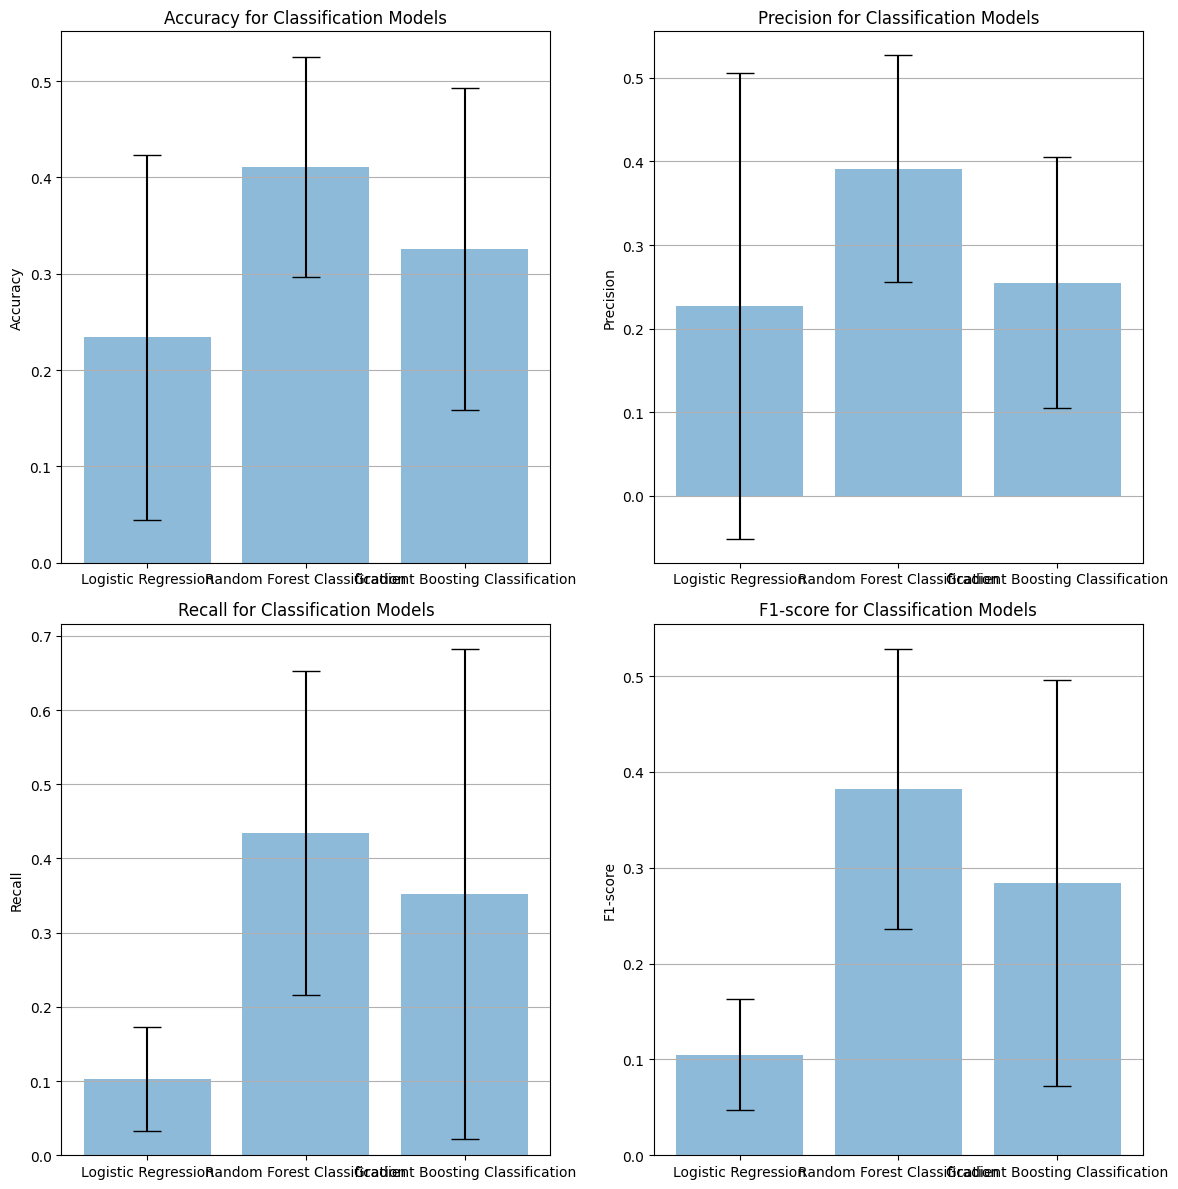

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")

# Определяем категориальные и числовые столбцы
numerical_cols = ["Open", "Close", "High", "Low"]

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[numerical_cols]
y_reg = df['Volume']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
mae_means = []
mae_stds = []
r2_means = []
r2_stds = []

for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    mae_means.append(mae_scores.mean())
    mae_stds.append(mae_scores.std())
    r2_means.append(r2_scores.mean())
    r2_stds.append(r2_scores.std())

# Визуализация результатов для задачи регрессии
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models_reg.keys(), mae_means, yerr=mae_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('MAE')
ax[0].set_title('Mean Absolute Error (MAE) for Regression Models')
ax[0].yaxis.grid(True)

ax[1].bar(models_reg.keys(), r2_means, yerr=r2_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_ylabel('R²')
ax[1].set_title('R-squared (R²) for Regression Models')
ax[1].yaxis.grid(True)

plt.tight_layout()
plt.show()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[numerical_cols]
y_class = (df['Volume'] > df['Volume'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
accuracy_means = []
accuracy_stds = []
precision_means = []
precision_stds = []
recall_means = []
recall_stds = []
f1_means = []
f1_stds = []

for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    accuracy_means.append(accuracy_scores.mean())
    accuracy_stds.append(accuracy_scores.std())
    precision_means.append(precision_scores.mean())
    precision_stds.append(precision_scores.std())
    recall_means.append(recall_scores.mean())
    recall_stds.append(recall_scores.std())
    f1_means.append(f1_scores.mean())
    f1_stds.append(f1_scores.std())

# Визуализация результатов для задачи классификации
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].bar(models_class.keys(), accuracy_means, yerr=accuracy_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Accuracy for Classification Models')
ax[0, 0].yaxis.grid(True)

ax[0, 1].bar(models_class.keys(), precision_means, yerr=precision_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('Precision for Classification Models')
ax[0, 1].yaxis.grid(True)

ax[1, 0].bar(models_class.keys(), recall_means, yerr=recall_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Recall for Classification Models')
ax[1, 0].yaxis.grid(True)

ax[1, 1].bar(models_class.keys(), f1_means, yerr=f1_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 1].set_ylabel('F1-score')
ax[1, 1].set_title('F1-score for Classification Models')
ax[1, 1].yaxis.grid(True)

plt.tight_layout()
plt.show()